In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,NaN,1.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,NaN,NaN,8.0,1.0,NaN,4.0,NaN,NaN,1.0
4,4.0,NaN,1.0,3.0,2.0,1.0,3.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,NaN,2.0,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4.0,10.0,NaN,6.0,3.0
681,1.0,1.0,1.0,3.0,NaN,1.0,1.0,1.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	129
float64		column 2	138
float64		column 3	130
float64		column 4	144
float64		column 5	146
float64		column 6	144
float64		column 7	135
float64		column 8	141
float64		column 9	122


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,554.000000,545.000000,553.000000,539.000000,537.000000,539.000000,548.000000,542.000000,561.000000
mean,4.472924,3.227523,3.218807,2.801484,3.210428,3.560297,3.489051,2.928044,1.568627
std,2.822057,3.108275,2.961873,2.857768,2.254854,3.667599,2.486870,3.109283,1.661329
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

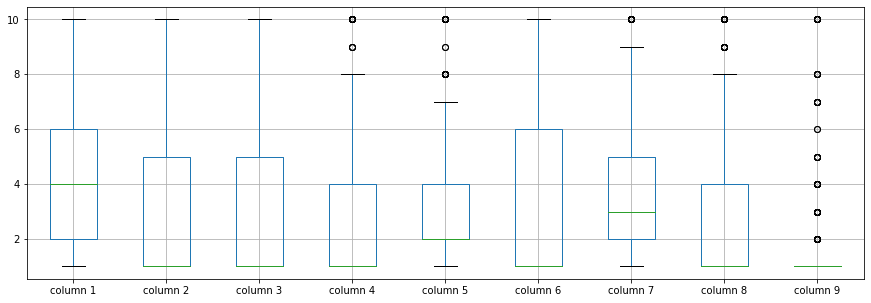

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.472924
column 2    3.227523
column 3    3.218807
column 4    2.801484
column 5    3.210428
column 6    3.560297
column 7    3.489051
column 8    2.928044
column 9    1.568627
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.669345,0.648655,0.495316,0.512147,0.568666,0.563873,0.520536,0.327089
column 2,0.669345,1.000000,0.906095,0.730934,0.744069,0.705553,0.792989,0.716398,0.434704
column 3,0.648655,0.906095,1.000000,0.707836,0.700231,0.723725,0.757739,0.734913,0.454020
column 4,0.495316,0.730934,0.707836,1.000000,0.591867,0.635933,0.669555,0.618087,0.435453
column 5,0.512147,0.744069,0.700231,0.591867,1.000000,0.593698,0.614334,0.618955,0.484738
column 6,0.568666,0.705553,0.723725,0.635933,0.593698,1.000000,0.678430,0.558991,0.332301
column 7,0.563873,0.792989,0.757739,0.669555,0.614334,0.678430,1.000000,0.635889,0.351716
column 8,0.520536,0.716398,0.734913,0.618087,0.618955,0.558991,0.635889,1.000000,0.428101
column 9,0.327089,0.434704,0.454020,0.435453,0.484738,0.332301,0.351716,0.428101,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+88,9+88+88,9+88+88,9+88+88+88+88,9+88+88+88,9+88+88,9+88,9], vae_layer = False, seed = 880)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.43140611194429
Epoch: 1 , loss: 29.082014265514555
Epoch: 2 , loss: 29.067799477350142
Epoch: 3 , loss: 27.96467158907936
Epoch: 4 , loss: 26.702376501900808
Epoch: 5 , loss: 25.49660246712821
Epoch: 6 , loss: 25.53714793069022
Epoch: 7 , loss: 24.21238274801345
Epoch: 8 , loss: 23.718760899135045
Epoch: 9 , loss: 23.767203058515275
Epoch: 10 , loss: 23.074330443427677
Epoch: 11 , loss: 22.80102620806013
Epoch: 12 , loss: 22.569993700299943
Epoch: 13 , loss: 22.29766677674793
Epoch: 14 , loss: 21.450914269401913
Epoch: 15 , loss: 21.681584040323894
Epoch: 16 , loss: 21.09965163185483
Epoch: 17 , loss: 20.904414653778076
Epoch: 18 , loss: 19.842077459607804
Epoch: 19 , loss: 20.433379922594344
Epoch: 20 , loss: 20.437859421684628
Epoch: 21 , loss: 19.541893300556
Epoch: 22 , loss: 19.464183761959983
Epoch: 23 , loss: 19.35988274074736
Epoch: 24 , loss: 19.465395700363885
Epoch: 25 , loss: 19.292361827

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.000000
column 3    4.279485
column 4    1.000000
column 5    2.000000
column 6    1.000000
column 7    2.000000
column 8    1.000000
column 9    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,-2.697726,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.576612,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,-2.962870,-5.764466,0.0,0.000000,-0.710400,0.0,-0.431617,-5.004238,0.000000
4,0.000000,0.038827,0.0,0.000000,0.000000,0.0,0.000000,-0.192923,0.000000
...,...,...,...,...,...,...,...,...,...
678,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
679,0.000000,0.000000,0.0,0.106912,0.000000,0.0,0.000000,0.000000,0.000000
680,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.551500,0.000000,0.000000
681,0.000000,0.000000,0.0,0.000000,0.187935,0.0,0.000000,0.000000,0.016946


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(90.16850060273171, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.2688962672702399

In [18]:
new_df.iloc[66,:]

column 1    1.000000
column 2    3.000000
column 3    3.000000
column 4    2.000000
column 5    2.000000
column 6    1.000000
column 7    7.617626
column 8    6.317862
column 9    1.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,2.302274,1.000000,1.0,1.000000,2.000000,1.0,3.000000,1.576612,1.000000
1,5.000000,4.000000,4.0,5.000000,7.000000,10.0,3.000000,2.000000,1.000000
2,3.000000,1.000000,1.0,1.000000,2.000000,2.0,3.000000,1.000000,1.000000
3,3.037130,2.235534,8.0,1.000000,2.289600,4.0,2.568383,1.995762,1.000000
4,4.000000,1.038827,1.0,3.000000,2.000000,1.0,3.000000,0.807077,1.000000
...,...,...,...,...,...,...,...,...,...
678,3.000000,1.000000,1.0,1.000000,2.000000,1.0,2.000000,1.000000,1.000000
679,2.000000,1.000000,1.0,1.106912,2.000000,1.0,3.000000,1.000000,1.000000
680,5.000000,10.000000,10.0,10.000000,4.000000,10.0,7.551500,6.000000,3.000000
681,1.000000,1.000000,1.0,3.000000,2.187935,1.0,1.000000,1.000000,1.016946


In [20]:
imputations[-1].to_excel("BCW_C_20(imp).xlsx", index=False, header=False)